In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk



In [ ]:
df = pd.read_csv('reviews_dataset.csv')
df.head()

,ProductTitle,ReviewTitle,ReviewContent,Date,Rating,Author,Country,Sentiment,Category,Generation
0,Intel Core i3 12100F 12th Gen Generation Deskt...,This is the best you'll get in this price rang...,If you would be building pc just for gaming an...,25-Jun-23,5,Padi Takhu,India,competition sentiment,i3,12th
1,Intel Core i3 12100F 12th Gen Generation Deskt...,Awesome,This is one of the best cpu in budget if you o...,16-Nov-22,5,shubham,India,competition sentiment,i3,12th
2,Intel Core i3 12100F 12th Gen Generation Deskt...,Best in price when even compared to i5 10400f,Got this on sale for 7.26k.. Really enjoyed wi...,15-Aug-22,5,Debasis Dhar,India,positive,i3,12th
3,Intel Core i3 12100F 12th Gen Generation Deskt...,Good,Performance is good,11-Nov-23,4,Lakhan Lal Uraon,India,positive,i3,12th
4,Intel Core i3 12100F 12th Gen Generation Deskt...,Used or Unboxed product received,Product is good but by looking at packaging an...,24-Aug-23,3,Ruchit,India,positive,i3,12th


<Axes: title={'center': 'Rating Distribution'}, xlabel='Rating'>

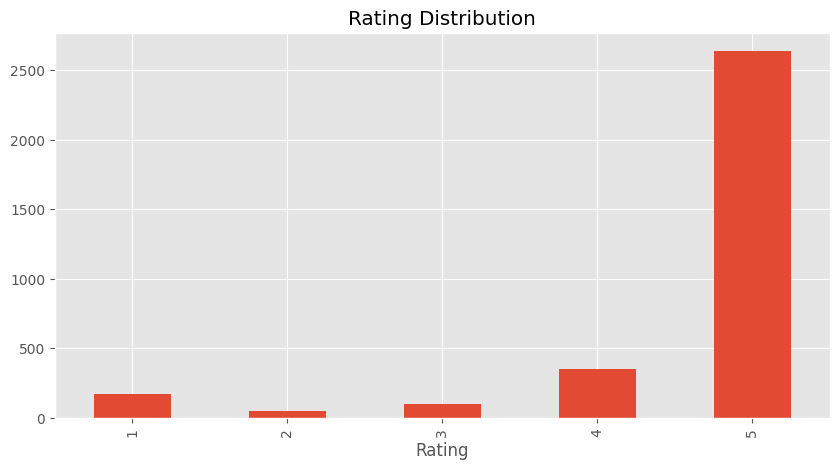

In [ ]:
df['Rating'].value_counts().sort_index().plot(kind='bar',title='Rating Distribution',figsize=(10,5))

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores('I am so sad')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [ ]:
#run polarity score in entire dataset
res={}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text=row['ReviewTitle']
    myid=row['Author']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/3310 [00:00<?, ?it/s]

In [ ]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Author'})
vaders=vaders.merge(df,how='left')

In [ ]:
#sentiment score
vaders.head()

,Author,neg,neu,pos,compound,ProductTitle,ReviewTitle,ReviewContent,Date,Rating,Country,Sentiment,Category,Generation
0,Padi Takhu,0.0,0.710,0.290,0.6696,Intel Core i3 12100F 12th Gen Generation Deskt...,This is the best you'll get in this price rang...,If you would be building pc just for gaming an...,25-Jun-23,5,India,competition sentiment,i3,12th
1,shubham,0.0,0.000,1.000,0.6249,Intel Core i3 12100F 12th Gen Generation Deskt...,Awesome,This is one of the best cpu in budget if you o...,16-Nov-22,5,India,competition sentiment,i3,12th
2,Debasis Dhar,0.0,0.656,0.344,0.6369,Intel Core i3 12100F 12th Gen Generation Deskt...,Best in price when even compared to i5 10400f,Got this on sale for 7.26k.. Really enjoyed wi...,15-Aug-22,5,India,positive,i3,12th
3,Lakhan Lal Uraon,0.0,0.000,1.000,0.4404,Intel Core i3 12100F 12th Gen Generation Deskt...,Good,Performance is good,11-Nov-23,4,India,positive,i3,12th
4,Ruchit,0.0,1.000,0.000,0.0000,Intel Core i3 12100F 12th Gen Generation Deskt...,Used or Unboxed product received,Product is good but by looking at packaging an...,24-Aug-23,3,India,positive,i3,12th


<Axes: xlabel='Rating', ylabel='compound'>

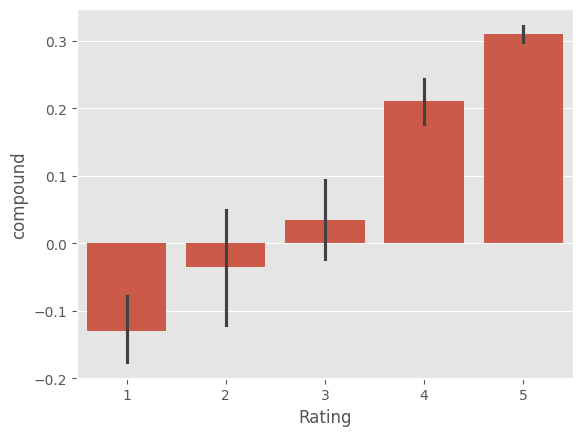

In [ ]:
sns.barplot(data=vaders,x='Rating',y='compound')

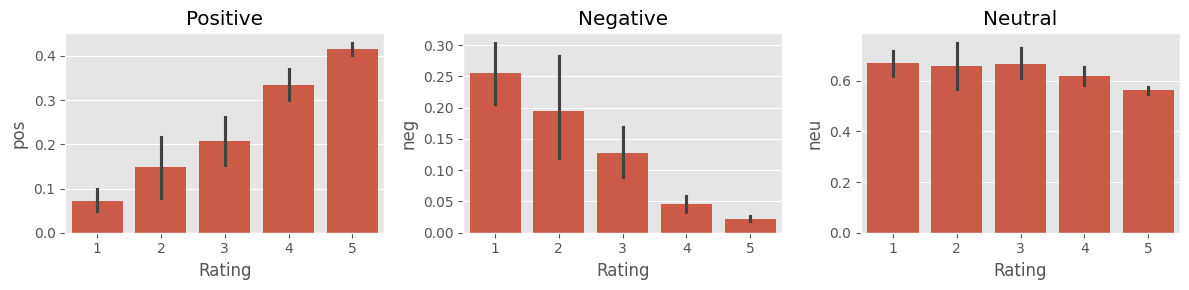

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Rating',y='pos',ax=axs[0])
sns.barplot(ax=axs[1],data=vaders,x='Rating',y='neg')
sns.barplot(ax=axs[2],data=vaders,x='Rating',y='neu')
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sentiment_pipeline("I am so happy")

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [ ]:
res2={}
for i,row in tqdm(df.iterrows(), total=len(df)):
    text=row['ReviewTitle']
    myid=row['Author']
    res2[myid]=sentiment_pipeline(text)

  0%|          | 0/3310 [00:00<?, ?it/s]

In [ ]:
trans=pd.DataFrame(res2).T
trans=trans.reset_index().rename(columns={'index':'Author'})
trans=trans.merge(df,how='left')
trans.head()

,Author,0,ProductTitle,ReviewTitle,ReviewContent,Date,Rating,Country,Sentiment,Category,Generation
0,Padi Takhu,"{'label': 'POSITIVE', 'score': 0.9995976090431...",Intel Core i3 12100F 12th Gen Generation Deskt...,This is the best you'll get in this price rang...,If you would be building pc just for gaming an...,25-Jun-23,5,India,competition sentiment,i3,12th
1,shubham,"{'label': 'POSITIVE', 'score': 0.9998682737350...",Intel Core i3 12100F 12th Gen Generation Deskt...,Awesome,This is one of the best cpu in budget if you o...,16-Nov-22,5,India,competition sentiment,i3,12th
2,Debasis Dhar,"{'label': 'POSITIVE', 'score': 0.9937523007392...",Intel Core i3 12100F 12th Gen Generation Deskt...,Best in price when even compared to i5 10400f,Got this on sale for 7.26k.. Really enjoyed wi...,15-Aug-22,5,India,positive,i3,12th
3,Lakhan Lal Uraon,"{'label': 'POSITIVE', 'score': 0.9998161196708...",Intel Core i3 12100F 12th Gen Generation Deskt...,Good,Performance is good,11-Nov-23,4,India,positive,i3,12th
4,Ruchit,"{'label': 'NEGATIVE', 'score': 0.9851182699203...",Intel Core i3 12100F 12th Gen Generation Deskt...,Used or Unboxed product received,Product is good but by looking at packaging an...,24-Aug-23,3,India,positive,i3,12th
